In [59]:
%pip install kaggle
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: scikit-learn in /home/artur/.local/lib/python3.8/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


# Assignment 1: Classification

# Breast Canser Dataset

184.702 Machine Learning (VU 3,0) 2022S

### Group37

**Members:** <br> Sogomonyan Artur (Student ID: 12143554) <br> van Ravenstein Aebe Jari (Student ID: )

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [61]:
data_train = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv', sep=",")

In [62]:
data_train

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,879804,False,9.876,17.27,62.92,295.4,0.10890,0.07232,0.017560,0.019520,...,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380
1,915691,True,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,...,16.41,29.66,113.30,844.4,0.1574,0.3856,0.51060,0.20510,0.3585,0.11090
2,891703,False,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,...,13.06,25.75,84.35,517.8,0.1369,0.1758,0.13160,0.09140,0.3101,0.07007
3,874158,False,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,...,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
4,872608,False,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,881972,True,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
281,8910506,False,12.870,16.21,82.38,512.2,0.09425,0.06219,0.039000,0.016150,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.19920,0.05780,0.3604,0.07062
282,869691,True,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
283,846226,True,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230


In [63]:
data_train.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.219993e+07,14.236102,19.293018,92.855895,667.182105,0.097041,0.108001,0.094441,0.051651,0.182267,...,16.354200,25.559684,108.064000,891.445965,0.132358,0.259684,0.283219,0.117507,0.291733,0.084700
std,1.311026e+08,3.658543,4.138072,25.338244,367.510060,0.014496,0.056781,0.083759,0.040760,0.028306,...,4.911127,6.072248,34.330646,574.035795,0.022694,0.165607,0.219701,0.068205,0.065722,0.019605
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.660830e+05,11.670000,16.350000,75.210000,419.800000,0.086750,0.067120,0.032960,0.021660,0.163100,...,12.830000,20.980000,83.510000,508.900000,0.117100,0.144200,0.118100,0.065170,0.248800,0.071230
50%,9.035540e+05,13.380000,18.680000,87.160000,555.100000,0.096870,0.098230,0.066640,0.037160,0.180000,...,15.050000,25.500000,98.400000,698.800000,0.133300,0.217000,0.230200,0.102500,0.284400,0.080820
75%,8.812844e+06,16.130000,21.780000,106.300000,803.100000,0.106100,0.131000,0.138500,0.080250,0.196700,...,19.190000,29.020000,126.700000,1138.000000,0.146400,0.344100,0.397600,0.167300,0.315500,0.092410
max,9.113205e+08,28.110000,33.560000,188.500000,2499.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,33.120000,49.540000,220.800000,3432.000000,0.209800,1.058000,1.170000,0.291000,0.663800,0.207500


In [64]:
data_train.isna().any().any()

False

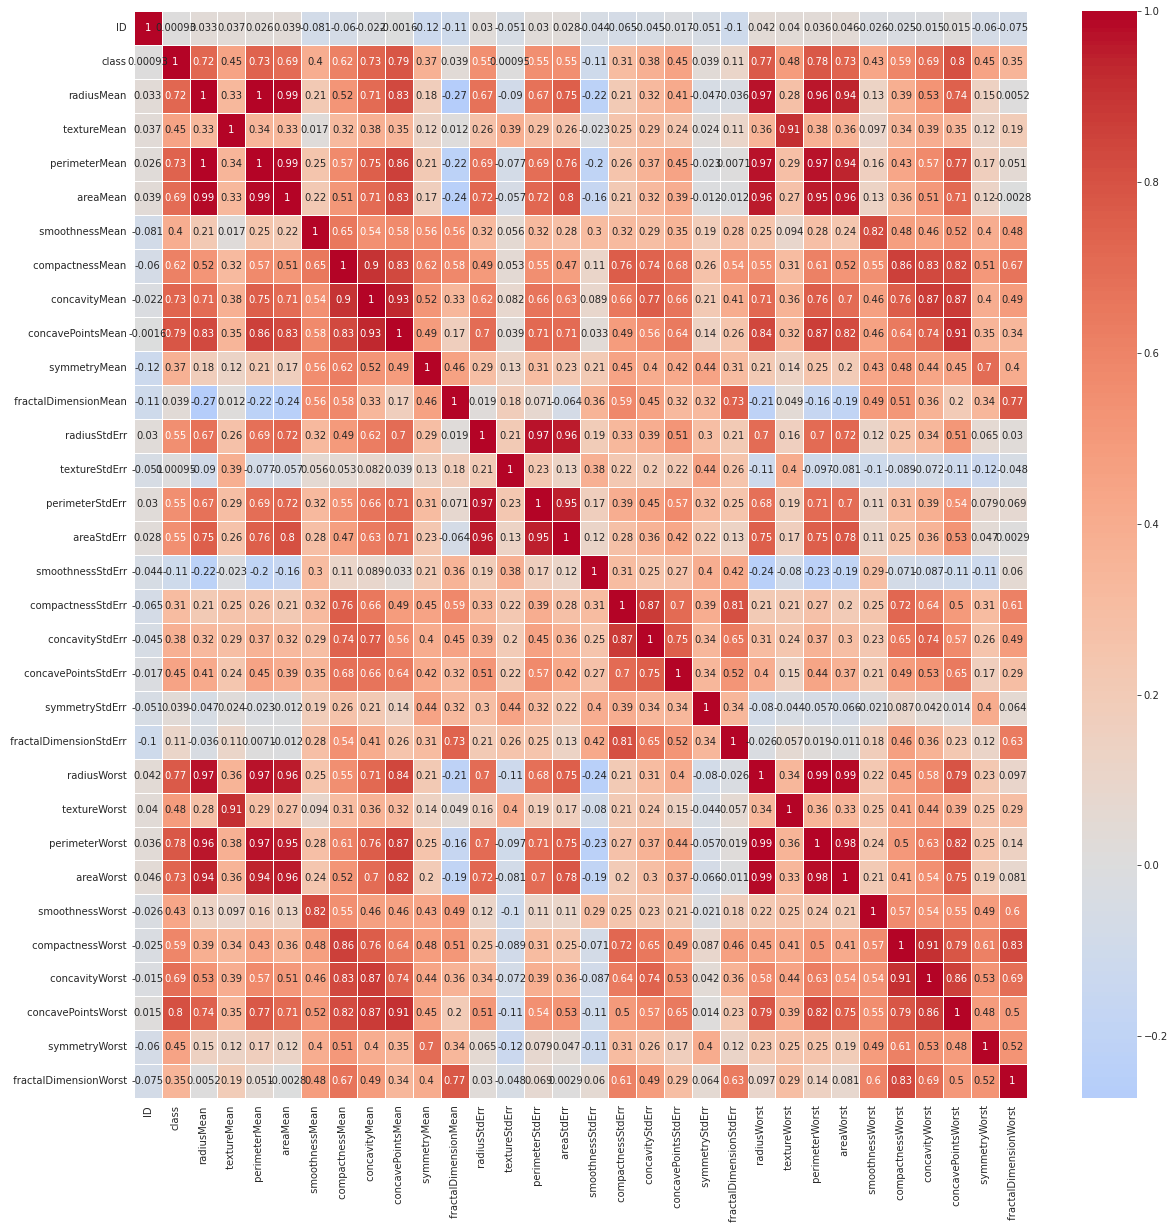

In [65]:
data_train.corr()['class']
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(),annot=True,linewidth=1,center=0,cmap='coolwarm')
plt.show()

TRUE:  113
Number of Malignant :  172


/home/artur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


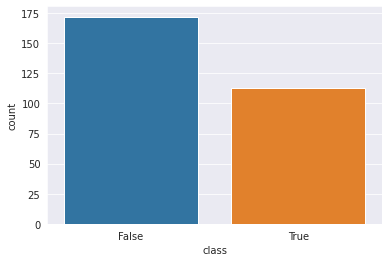

In [66]:
# counting the number of labels
_ = sns.countplot(data_train['class'] ,label="Class")
F, T = data_train['class'].value_counts()
print('TRUE: ',T)
print('Number of Malignant : ',F)

In [67]:
# mapping Tre/False values to 0,1
data_train['class']=data_train['class'].map({True:1,False:0})
data_train

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,879804,0,9.876,17.27,62.92,295.4,0.10890,0.07232,0.017560,0.019520,...,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380
1,915691,1,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,...,16.41,29.66,113.30,844.4,0.1574,0.3856,0.51060,0.20510,0.3585,0.11090
2,891703,0,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,...,13.06,25.75,84.35,517.8,0.1369,0.1758,0.13160,0.09140,0.3101,0.07007
3,874158,0,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,...,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
4,872608,0,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,881972,1,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
281,8910506,0,12.870,16.21,82.38,512.2,0.09425,0.06219,0.039000,0.016150,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.19920,0.05780,0.3604,0.07062
282,869691,1,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.074150,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
283,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230


In [68]:
X_train = data_train.iloc[:, 2:].values
y_train = data_train.iloc[:,1].values
# X_train
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [69]:
data_test_original = pd.read_csv('breast-cancer-diagnostic.shuf.tes.csv', sep=",")
data_test = data_test_original.iloc[:, 1:].values
data_test

array([[1.108e+01, 1.883e+01, 7.330e+01, ..., 2.524e-01, 4.154e-01,
        1.403e-01],
       [1.298e+01, 1.935e+01, 8.452e+01, ..., 9.858e-02, 3.596e-01,
        9.166e-02],
       [1.245e+01, 1.570e+01, 8.257e+01, ..., 1.741e-01, 3.985e-01,
        1.244e-01],
       ...,
       [8.598e+00, 2.098e+01, 5.466e+01, ..., 2.778e-02, 2.972e-01,
        7.712e-02],
       [1.146e+01, 1.816e+01, 7.359e+01, ..., 5.509e-02, 2.208e-01,
        7.638e-02],
       [1.981e+01, 2.215e+01, 1.300e+02, ..., 2.388e-01, 2.768e-01,
        7.615e-02]])

In [70]:
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [71]:
sc = StandardScaler()
# X_train_norm = sc.fit_transform(X_train)
X_train_norm = sc.fit_transform(X_train)
X_train_norm_sp = sc.fit_transform(X_train_sp)

In [72]:
def train_model(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    predictions = model.predict(sc.transform(X_test))
    return predictions

def train_evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(sc.transform(X_test))
    accuracy = metrics.accuracy_score(predictions,y_test)
    f1  = metrics.f1_score(predictions,y_test)
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("F1 Score : "  "{0:.3}\n".format(f1))
    # cm = metrics.confusion_matrix(y_test, predictions)
    # sns.heatmap(cm,annot=True)

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=3)
train_evaluate_model(knn_model, X_train_norm_sp, y_train_sp, X_test_sp, y_test_sp)
# for k in range(1, 51):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     train_evaluate_model(knn_model, X_train_norm, y_train, X_test, y_test )
#
# predictions = train_model(knn_model, X_train_norm, y_train, X_test)

Accuracy : 96.842%
F1 Score : 0.957



In [74]:
dt_model = DecisionTreeClassifier()
train_evaluate_model(dt_model, X_train_norm_sp, y_train_sp, X_test_sp, y_test_sp)
# predictions = train_model(dt_model, X_train_norm, y_train, X_test)

Accuracy : 95.789%
F1 Score : 0.944



In [75]:
lr_model = LogisticRegression()
train_evaluate_model(lr_model, X_train_norm_sp, y_train_sp, X_test_sp, y_test_sp )
# predictions = train_model(lr_model, X_train_norm, y_train, data_test)

Accuracy : 96.842%
F1 Score : 0.957



In [76]:
# output = pd.DataFrame({
#     'ID': data_test_original["ID"],
#     'class': predictions
# })
# output.to_csv('output.csv', index=False, sep=',')